In [2]:
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns 
import nltk
import re 

## Data Loading and Understanding

In [3]:
data = pd.read_csv("IMDBDataset.csv")

data.columns = ['body_text', 'review']


In [4]:
# Print the raw data
data[0:5000]

,body_text,review
0,One of the other reviewers has mentioned that ...,positive
1,A wonderful little production. <br /><br />The...,positive
2,I thought this was a wonderful way to spend ti...,positive
3,Basically there's a family where a little boy ...,negative
4,"Petter Mattei's ""Love in the Time of Money"" is...",positive
...,...,...
4995,An interesting slasher film with multiple susp...,negative
4996,i watched this series when it first came out i...,positive
4997,Once again Jet Li brings his charismatic prese...,positive
4998,"I rented this movie, after hearing Chris Gore ...",negative


In [5]:
data.head()

,body_text,review
0,One of the other reviewers has mentioned that ...,positive
1,A wonderful little production. <br /><br />The...,positive
2,I thought this was a wonderful way to spend ti...,positive
3,Basically there's a family where a little boy ...,negative
4,"Petter Mattei's ""Love in the Time of Money"" is...",positive


In [6]:
data.columns

Index(['body_text', 'review'], dtype='object')

In [7]:
reviews_count = data['review'].value_counts()
reviews_count

review
positive    25000
negative    25000
Name: count, dtype: int64

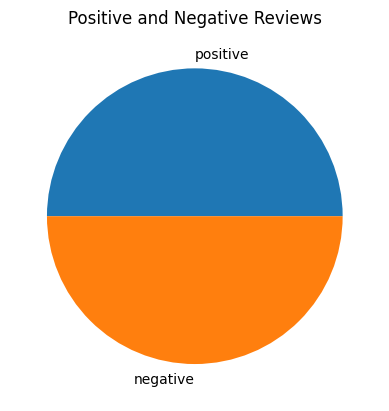

In [8]:

plt.pie(reviews_count, labels = reviews_count.index)
plt.title('Positive and Negative Reviews')
plt.ylabel('')
plt.show()


### This shows positive and negative review are 50-50 %

## Step 2 : Text preprocessing

### 1.Removing html text using Beautifulsoup

In [9]:
from bs4 import BeautifulSoup

data['body_text'] = data['body_text'].apply(
             lambda body_text: BeautifulSoup(body_text, "html.parser").get_text()
    )

C:\Users\nirma\AppData\Local\Temp\ipykernel_29060\78124473.py:4: MarkupResemblesLocatorWarning: The input looks more like a filename than markup. You may want to open this file and pass the filehandle into Beautiful Soup.
  lambda body_text: BeautifulSoup(body_text, "html.parser").get_text()


In [10]:
import string
string.punctuation

'!"#$%&\'()*+,-./:;<=>?@[\\]^_`{|}~'

In [11]:

stopwords = nltk.corpus.stopwords.words('english')

#This converts to lower case , remove punctuation and special char 
def clean_text(text):
    lower_case_text = text.lower()
    text = "".join([word for word in lower_case_text if word not in string.punctuation])
    tokens = re.split('\W+', text)
    text = [word for word in tokens if word not in stopwords]
    return text

data['body_text_nostop'] = data['body_text'].apply(lambda text:clean_text(text))

data.head()

,body_text,review,body_text_nostop
0,One of the other reviewers has mentioned that ...,positive,"[one, reviewers, mentioned, watching, 1, oz, e..."
1,A wonderful little production. The filming tec...,positive,"[wonderful, little, production, filming, techn..."
2,I thought this was a wonderful way to spend ti...,positive,"[thought, wonderful, way, spend, time, hot, su..."
3,Basically there's a family where a little boy ...,negative,"[basically, theres, family, little, boy, jake,..."
4,"Petter Mattei's ""Love in the Time of Money"" is...",positive,"[petter, matteis, love, time, money, visually,..."


### Stemming 

In [12]:
ps = nltk.PorterStemmer()

In [13]:


def stemming(tokenized_text):
    text = [ps.stem(word) for word in tokenized_text]
    return text

data['body_text_stemmed'] = data['body_text_nostop'].apply(lambda x: stemming(x))

data.head()

,body_text,review,body_text_nostop,body_text_stemmed
0,One of the other reviewers has mentioned that ...,positive,"[one, reviewers, mentioned, watching, 1, oz, e...","[one, review, mention, watch, 1, oz, episod, y..."
1,A wonderful little production. The filming tec...,positive,"[wonderful, little, production, filming, techn...","[wonder, littl, product, film, techniqu, unass..."
2,I thought this was a wonderful way to spend ti...,positive,"[thought, wonderful, way, spend, time, hot, su...","[thought, wonder, way, spend, time, hot, summe..."
3,Basically there's a family where a little boy ...,negative,"[basically, theres, family, little, boy, jake,...","[basic, there, famili, littl, boy, jake, think..."
4,"Petter Mattei's ""Love in the Time of Money"" is...",positive,"[petter, matteis, love, time, money, visually,...","[petter, mattei, love, time, money, visual, st..."


## for practice only(body_length and punc%)

In [ ]:
def count_punct(text):
    punct_count = [char for char in text if char in string.punctuation]
    sum_of_punct = len(punct_count)
    return sum_of_punct/(len(text) - text.count(" ")) * 200 



data['body_length'] = data['body_text'].apply(lambda text:len(text) - text.count(" "))
data['punct_percent'] = data['body_text'].apply(lambda text:count_punct(text))

In [20]:
data.head()

,body_text,review,body_text_nostop,body_text_stemmed,body_length,punct_percent
0,One of the other reviewers has mentioned that ...,positive,"[one, reviewers, mentioned, watching, 1, oz, e...","[one, review, mention, watch, 1, oz, episod, y...",1425,0.042105
1,A wonderful little production. The filming tec...,positive,"[wonderful, little, production, filming, techn...","[wonder, littl, product, film, techniqu, unass...",807,0.032218
2,I thought this was a wonderful way to spend ti...,positive,"[thought, wonderful, way, spend, time, hot, su...","[thought, wonder, way, spend, time, hot, summe...",741,0.037787
3,Basically there's a family where a little boy ...,negative,"[basically, theres, family, little, boy, jake,...","[basic, there, famili, littl, boy, jake, think...",581,0.041308
4,"Petter Mattei's ""Love in the Time of Money"" is...",positive,"[petter, matteis, love, time, money, visually,...","[petter, mattei, love, time, money, visual, st...",1048,0.030534
